### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image

### Testing GPU

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Data Preprocessing

##### Data Augmentation

In [3]:
train_path = 'Datasets/train'
test_path = 'Datasets/test'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 seed = 42)

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            seed = 42)

Found 22642 images belonging to 1 classes.
Found 1628 images belonging to 1 classes.


### Building CNN Model

In [4]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Training the CNN Model

In [6]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
708/708 [==============================] - 82s 115ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 4.8647e-04 - val_accuracy: 1.0000
Epoch 2/15
708/708 [==============================] - 60s 85ms/step - loss: 1.9650e-04 - accuracy: 1.0000 - val_loss: 2.9997e-05 - val_accuracy: 1.0000
Epoch 3/15
708/708 [==============================] - 61s 86ms/step - loss: 1.1527e-04 - accuracy: 1.0000 - val_loss: 1.9897e-05 - val_accuracy: 1.0000
Epoch 4/15
708/708 [==============================] - 60s 85ms/step - loss: 5.4738e-06 - accuracy: 1.0000 - val_loss: 4.9859e-07 - val_accuracy: 1.0000
Epoch 5/15
708/708 [==============================] - 60s 85ms/step - loss: 2.6834e-04 - accuracy: 1.0000 - val_loss: 1.4255e-04 - val_accuracy: 1.0000
Epoch 6/15
708/708 [==============================] - 60s 84ms/step - loss: 7.5787e-05 - accuracy: 1.0000 - val_loss: 3.3066e-05 - val_accuracy: 1.0000
Epoch 7/15
708/708 [==============================] - 62s 87ms/step - loss: 1.6541e-05 - ac

### Plotting the loss and accuracy

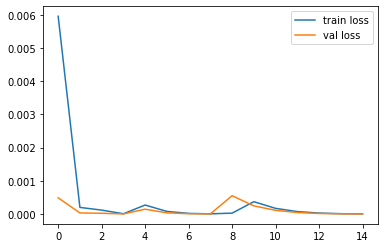

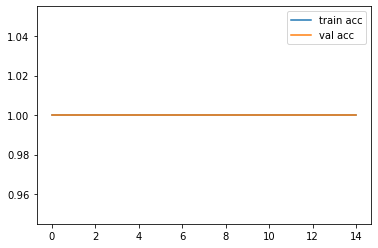

<Figure size 432x288 with 0 Axes>

In [7]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Making a single prediction

In [9]:
test_image = image.load_img('Datasets/test/test/1143.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [10]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


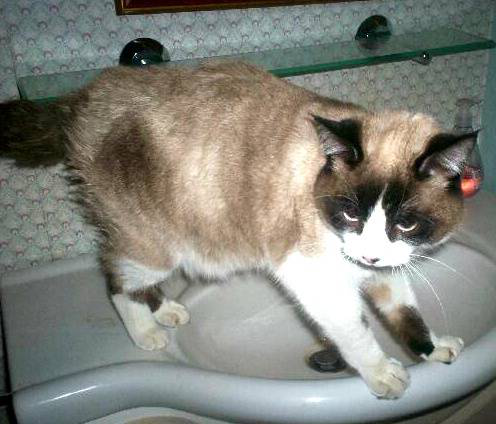

In [13]:
image = Image.open("Datasets/test/test/1143.jpg")
image